# Chapter 4: Algebra and Symbolic Math with SymPy

## Defining symbols and symbolic operations

Symbols（記号）と Mathematical Expressions（数式）の定義

In [1]:
from sympy import Symbol

x = Symbol("x")
type(x)

sympy.core.symbol.Symbol

In [2]:
x + x + 1

2*x + 1

記号には異なる変数名を割り当てる事もできるが、紛らわしいだけ。

In [3]:
a = Symbol("x")
x + x + 1

2*x + 1

In [4]:
a == x

True

In [5]:
a.name

'x'

`symbols()` 関数で複数の記号を同時に定義

In [6]:
from sympy import symbols

x, y, z = symbols("x, y, z")

数式は自動的に単純な形に変形される。

In [7]:
s = x * y + x * y
s

2*x*y

In [8]:
p = x * (x + x)
p

2*x**2

しかし複雑な式は自動的に変形されない。

In [9]:
p = (x + 2) * (x + 3)
p

(x + 2)*(x + 3)

In [10]:
x * (x + 1)

x*(x + 1)

In [11]:
p = x ** 2 + 2 * x + 1
p

x**2 + 2*x + 1

## Working with Expressions

### Factorizing and Expanding Expressions

In [12]:
from sympy import expand, factor

expr = x ** 2 - y ** 2
expr

x**2 - y**2

In [13]:
factor(expr)

(x - y)*(x + y)

In [14]:
expr = x ** 3 + 3 * x ** 2 * y + 3 * x * y ** 2 + y ** 3
expr

x**3 + 3*x**2*y + 3*x*y**2 + y**3

In [15]:
factors = factor(expr)
factors

(x + y)**3

In [16]:
expand(factors)

x**3 + 3*x**2*y + 3*x*y**2 + y**3

In [17]:
expr = x ** 2 + x * y + y ** 2
expr

x**2 + x*y + y**2

In [18]:
factor(expr)

x**2 + x*y + y**2

### Pretty Printing

In [19]:
expr = x ** 2 + 2 * x * y + y ** 2
print(expr)

x**2 + 2*x*y + y**2


`pprint()` 関数で、数式がアスキーアートで表示される

In [20]:
from sympy import pprint

pprint(expr)

 2            2
x  + 2⋅x⋅y + y 


In [21]:
display(expr)

x**2 + 2*x*y + y**2

デフォルトで項は次数に関して降順でソートされる

In [22]:
expr = 1 + x + 2 * x ** 2
expr

2*x**2 + x + 1

In [23]:
pprint(expr)

   2        
2⋅x  + x + 1


`init_printing()` 関数で項の順番を変えられるはずだけど、思うように動かない。

In [24]:
from sympy import init_printing

init_printing(order="grevlex")
expr = 1 + 2 * x + 2 * x ** 2
pprint(expr)

   2          
2⋅x  + 2⋅x + 1


#### Printing a Series

In [25]:
def series(n):
    x = Symbol("x")
    series = sum([(x ** i) / i for i in range(1, n + 1)])
    display(series)


series(2)
series(5)
series(7)

### Substituting in Values

`subs()` メソッドで式への代入が出来る。代入するのは値でも式でもよい。

In [26]:
import sympy

x, y = sympy.symbols("x, y")

expr = x ** 2 + 2 * x * y + y ** 2
expr

In [27]:
expr.subs({x: 1, y: 2})

$x$ に $1-y$ を代入

In [28]:
expr = expr.subs({x: 1 - y})
expr

`simplify()` 関数で自動変形する。

In [29]:
sympy.simplify(expr)

#### Calculating the Value of a Series

In [30]:
def series(n, x_value):
    x = Symbol("x")
    series = sum([(x ** i) / i for i in range(1, n + 1)])
    display(series)

    # Evaluate the series at x_value
    print("Value of the series at {0}: {1}".format(x_value, series.subs({x: x_value})))


series(5, 1.2)

Value of the series at 1.2: 3.51206400000000


### Converting Strings to Mathematical Expressions

In [31]:
expr = sympy.simplify("x**2 + 3*x + x**3 + 2*x")
expr

In [32]:
expr = sympy.simplify("x**2 + 3*x + x**3 + 2x")

SympifyError: Sympify of expression 'could not parse 'x**2 + 3*x + x**3 + 2x'' failed, because of exception being raised:
SyntaxError: invalid syntax (<string>, line 1)

In [33]:
try:
    expr = sympy.simplify("x**2 + 3*x + x**3 + 2x")
except sympy.SympifyError:
    print("invalid expression")

invalid expression


#### Expression Multiplier

In [34]:
def product(expr1, expr2):
    prod = sympy.expand(expr1 * expr2)
    display(prod)


product(x ** 2 + x * 2 + x, x ** 3 + x * 3 + x)

## Solving Equations

In [35]:
import sympy

x = sympy.Symbol("x")

expr = x - 5 - 7
sympy.solve(expr)

### Solving Quadratic Equations

In [36]:
expr = x ** 2 + 5 * x + 4
sympy.solve(expr, dict=True)

In [37]:
expr = x ** 2 + x + 1
sympy.solve(expr, dict=True)

### Solving for One Variable in Terms of Others

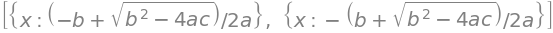

In [38]:
x, a, b, c = sympy.symbols("x, a, b, c")

expr = a * x * x + b * x + c
sympy.solve(expr, x, dict=True)

運動方程式

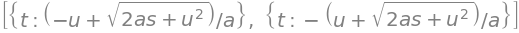

In [39]:
s, u, t, a = sympy.symbols("s, u, t, a")

expr = u * t + sympy.Rational(1, 2) * a * t ** 2 - s
sympy.solve(expr, t, dict=True)

### Solving a System of Linear Equations

In [40]:
expr1 = 2 * x + 3 * y - 6
expr2 = 3 * x + 2 * y - 12
sol = sympy.solve((expr1, expr2), dict=True)
sol

検算

In [41]:
expr1.subs(sol[0])

In [42]:
expr2.subs(sol[0])

## Plotting using SymPy

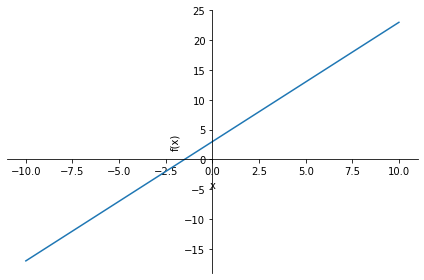

In [43]:
import sympy
from sympy.plotting import plot

x = sympy.Symbol("x")

plot(2 * x + 3)

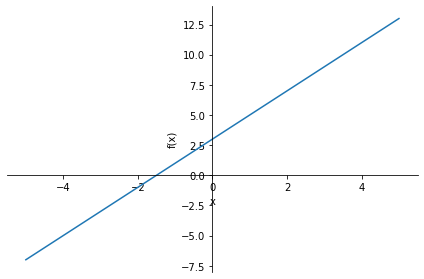

In [44]:
plot((2 * x + 3), (x, -5, 5))

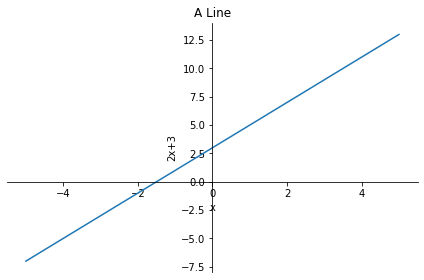

In [45]:
plot((2 * x + 3), (x, -5, 5), title="A Line", xlabel="x", ylabel="2x+3")

2元方程式では $y$ について解いてから `plotting()` 関数に渡す

In [46]:
x, y = sympy.symbols("x, y")

expr = 2 * x + 3 * y - 6
f = sympy.solve(expr, y)
f

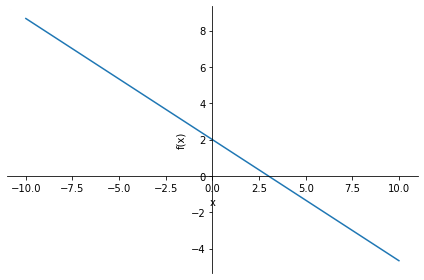

In [47]:
plot(f[0])

### Plotting Multiple Functions

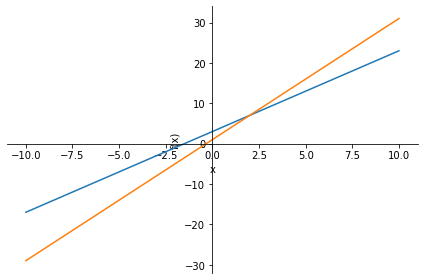

In [48]:
plot(2 * x + 3, 3 * x + 1)

凡例を表示して、直線の色を変える。

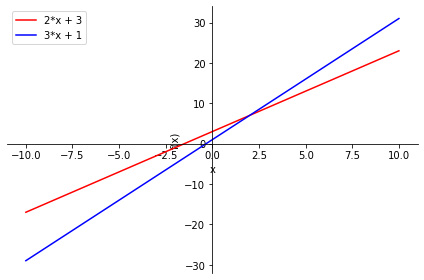

In [49]:
p = plot(2 * x + 3, 3 * x + 1, legend=True, show=False)
p[0].line_color = "r"
p[1].line_color = "b"
p.show()